## Final Project Submission

Please fill out:
* Student name: James Brochhausen
* Student pace: part time
* Scheduled project review date/time: 10/08/2020
* Instructor name: James Irving

## Introduction

Focus on the why, rather than the how.

In the following notebook we will be uncovering information from a dataset. Particularly, we will be understanding why a customer churns. To do this we will be walking through two classification models. The data we will be reviewing will be for a telecommunication. What we explore throughout this is, which features (columns) are the most important. We also need to understand their importance, meaning, is it important because it causes churn or is it important because it does not cause churn. This will be the main goal to understand throughout this notebook.

## Importing and Exploring Data

In [1]:
#importing necessary functions.
import pandas as pd
import numpy as np
import pandas as pd
import sklearn.metrics as metrics
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
# from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn import tree
# from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix
from xgboost import XGBRFClassifier,XGBClassifier
import shap
from imblearn.over_sampling import SMOTE
shap.initjs()

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported fr

In [2]:
# REPLACE STILL

def evaluate_model(y_true, y_pred,X_true,clf,cm_kws=dict(cmap="Greens",
                                  normalize='true'),figsize=(10,4),
                   plot_roc_auc=True):
    
    ## Classification Report & Scores 
    print(metrics.classification_report(y_true,y_pred))

    if plot_roc_auc:
        num_cols=2
    else:
        num_cols=1
        
    fig, ax = plt.subplots(figsize=figsize,ncols=num_cols)
    
    if not isinstance(ax,np.ndarray):
        ax=[ax]
    metrics.plot_confusion_matrix(clf,X_true,y_true,ax=ax[0],**cm_kws)
    ax[0].set(title='Confusion Matrix')
    
    if plot_roc_auc:
        try:
            y_score = clf.predict_proba(X_true)[:,1]

            fpr,tpr,thresh = metrics.roc_curve(y_true,y_score)
            # print(f"ROC-area-under-the-curve= {}")
            roc_auc = round(metrics.auc(fpr,tpr),3)
            ax[1].plot(fpr,tpr,color='darkorange',
                       label=f'ROC Curve (AUC={roc_auc})')
            ax[1].plot([0,1],[0,1],ls=':')
            ax[1].legend()
            ax[1].grid()
            ax[1].set(ylabel='True Positive Rate',
                      xlabel='False Positive Rate',
                  title='Receiver operating characteristic (ROC) Curve')
            plt.tight_layout()
            plt.show()
        except:
            pass
    try: 
        df_important = plot_importance(clf)
    except:
        df_important = None

In [3]:
#Opening my data
df = pd.read_csv('bigml_59c28831336c6604c800002a.csv')
pd.set_option('display.max_columns', None)
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
df.nunique()

state                       51
account length             212
area code                    3
phone number              3333
international plan           2
voice mail plan              2
number vmail messages       46
total day minutes         1667
total day calls            119
total day charge          1667
total eve minutes         1611
total eve calls            123
total eve charge          1440
total night minutes       1591
total night calls          120
total night charge         933
total intl minutes         162
total intl calls            21
total intl charge          162
customer service calls      10
churn                        2
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [6]:
df.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [7]:
# Dropping Phone Number
# Setting my X and y data
y = df['churn'].astype(int)
X = df.drop(columns = ['churn', 'phone number']).copy()

In [8]:
y.value_counts(normalize = True)

0    0.855086
1    0.144914
Name: churn, dtype: float64

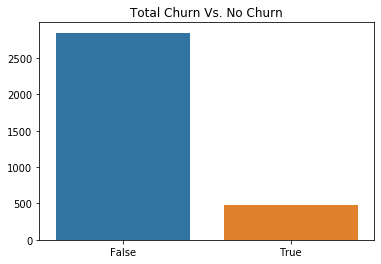

In [9]:
t_f = df['churn'].value_counts()
ax = sns.barplot(t_f.index, t_f.values).set_title('Total Churn Vs. No Churn')
# ax.set(xlabel = 'Churn', ylabel = 'Total Amount')
plt.show()

In [10]:
df['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

## EDA (LOOK INTO THIS)

In [11]:
# pd.plotting.scatter_matrix(X)

In [12]:
columns = list(df.columns)

In [13]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [14]:
# fig, axes = plt.subplots(nrows=len(columns), ncols=1, figsize=(14,4))

days = ['account length']
minutes = ['total day minutes','total eve minutes','total night minutes',
           'total intl minutes', 'customer service calls']
calls = ['total day calls','total eve calls','total night calls',
         'total intl calls']
charge = ['total day charge','total eve charge','total night charge',
          'total intl charge']

mean = df.groupby('churn').mean()
print(mean)
# fig = plt.figure(figsize = (10, 5)) 



       account length   area code  number vmail messages  total day minutes  \
churn                                                                         
False      100.793684  437.074737               8.604561         175.175754   
True       102.664596  437.817805               5.115942         206.914079   

       total day calls  total day charge  total eve minutes  total eve calls  \
churn                                                                          
False       100.283158         29.780421         199.043298       100.038596   
True        101.335404         35.175921         212.410145       100.561077   

       total eve charge  total night minutes  total night calls  \
churn                                                             
False         16.918909           200.133193         100.058246   
True          18.054969           205.231677         100.399586   

       total night charge  total intl minutes  total intl calls  \
churn                     

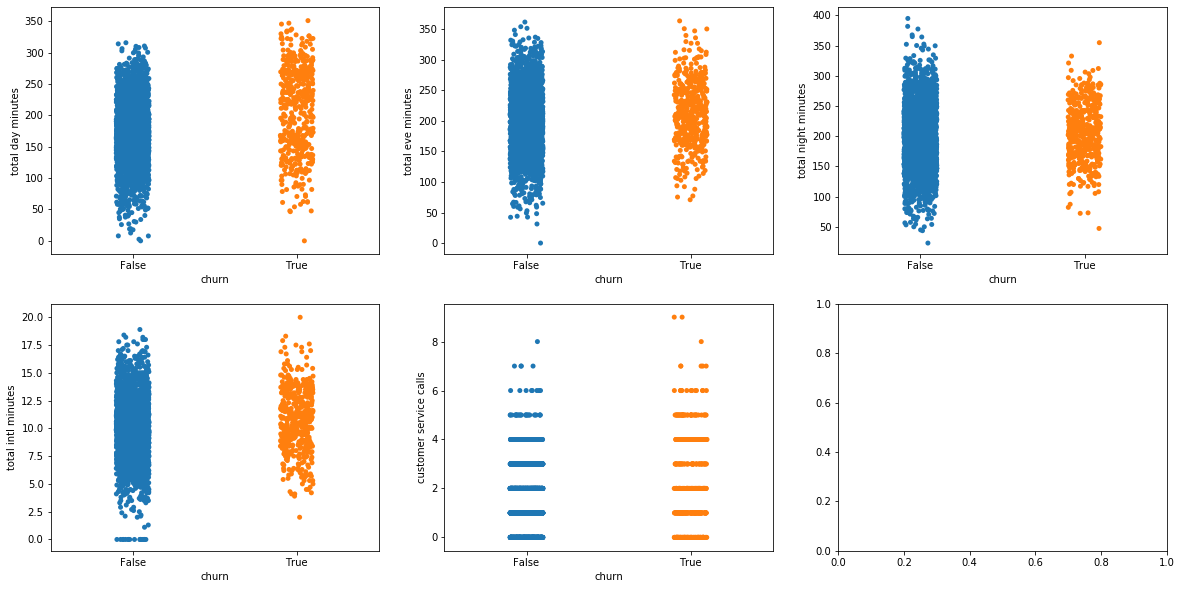

In [15]:
# fig = plt.figure()
fig, ax = plt.subplots(2, 3, figsize=(20,10))
for i, col in enumerate(minutes):  
    sns.catplot(x='churn', y=col, data=df, ax=ax[i//3][i%3])
    plt.close()
    

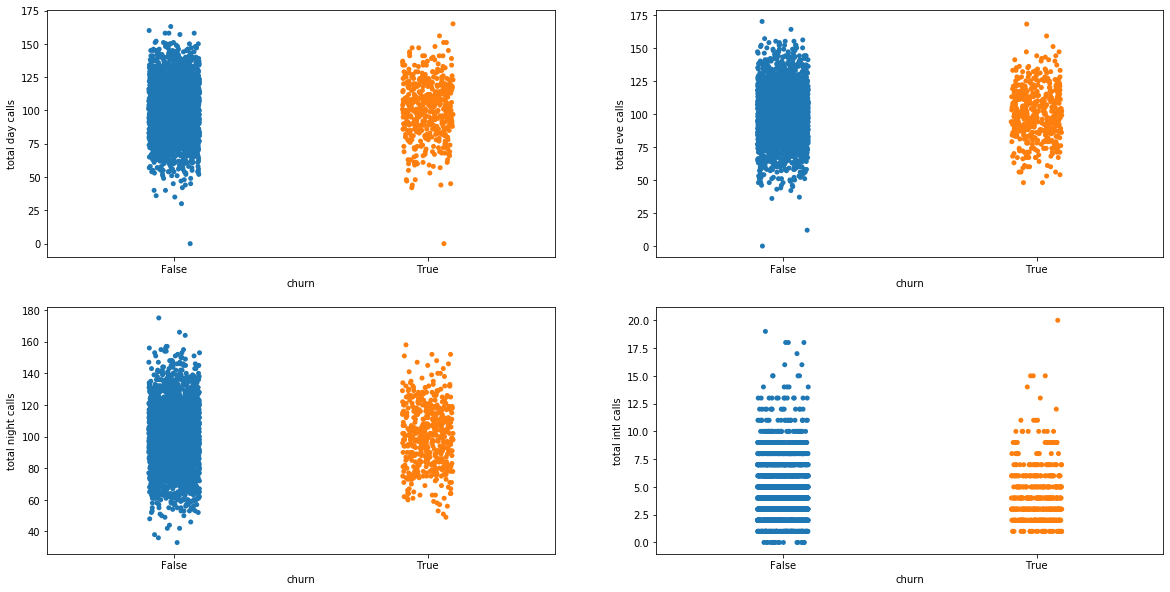

In [16]:
fig, ax = plt.subplots(2, 2, figsize=(20,10))
for i, col in enumerate(calls):  
    sns.catplot(x='churn', y=col, data=df, ax=ax[i//2][i%2])
    plt.close()

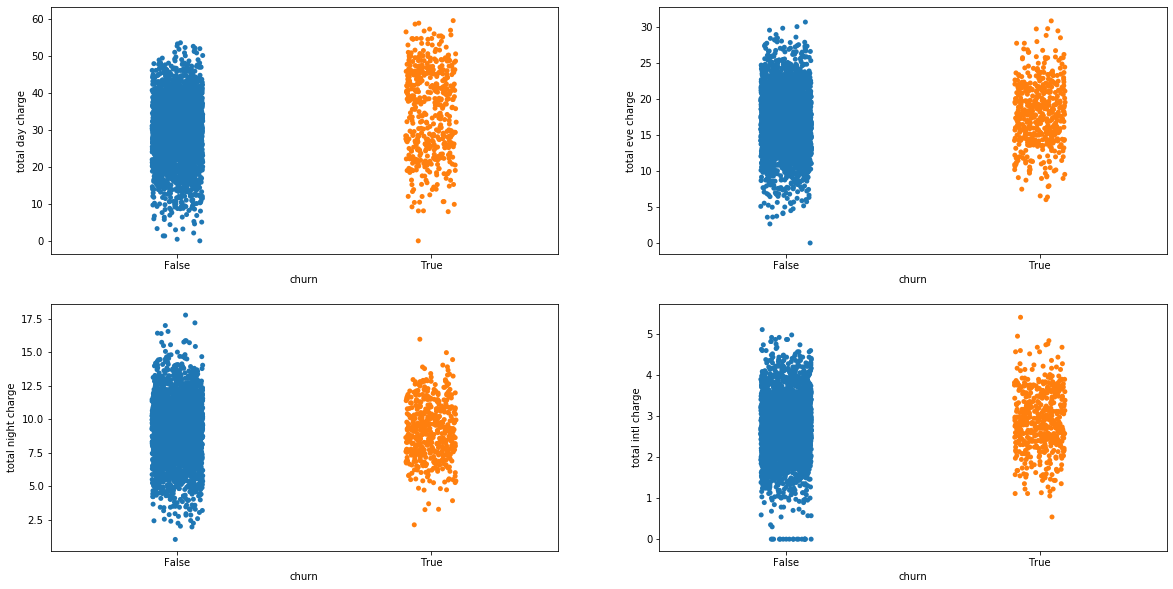

In [17]:
fig, ax = plt.subplots(2, 2, figsize=(20,10))
for i, col in enumerate(charge):  
    sns.catplot(x='churn', y=col, data=df, ax=ax[i//2][i%2])
    plt.close()

In [18]:
df[df['churn']==True]['total night charge']

10       9.40
15       7.23
21       9.43
33      12.61
41       5.50
        ...  
3301     7.06
3304     9.29
3320     5.40
3322     8.12
3323    10.22
Name: total night charge, Length: 483, dtype: float64

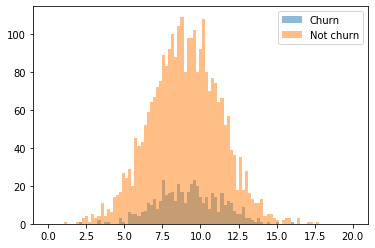

In [19]:
bins = np.linspace(0, 20, 100)
plt.hist(df[df['churn']==True]['total night charge'], bins, alpha=0.5, label='Churn')
plt.hist(df[df['churn']==False]['total night charge'], bins, alpha=0.5, label='Not churn')
plt.legend(loc='upper right')
plt.show()

## Get dummies

In [20]:
X = pd.get_dummies(X)

## Train Test Split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,
                                                    random_state=10)

### Dealing with Class Imbalance

In [22]:
y_test.value_counts(normalize = True)

0    0.863
1    0.137
Name: churn, dtype: float64

In [23]:
X_train_smote, y_train_smote = SMOTE().fit_resample(X_train, y_train) 

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [31]:
std_scale = StandardScaler()


X_train_scaled = std_scale.fit_transform(X_train_smote)
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X.columns)
X_test_scaled = std_scale.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X.columns)

In [38]:
pd.Series(y_train_smote).value_counts()

1    1987
0    1987
dtype: int64

## Random Forest

In [35]:
rf_clf = RandomForestClassifier(random_state=10)

rf_clf.fit(X_train_scaled, y_train_smote)

RandomForestClassifier(random_state=10)

In [36]:
y_pred = rf_clf.predict(X_test_scaled)

In [40]:
acc = accuracy_score(y_test,y_pred) * 100
print(('Accuracy :{0}'.format(acc))),2

# AUC
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,
                                                                y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('\nAUC :{0}'.format(round(roc_auc, 2)))

# Printed confusion matrix 
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'],
            margins=True)

Accuracy :94.69999999999999

AUC :0.86


Predicted,0,1,All
True,,,
0,845,18,863
1,35,102,137
All,880,120,1000


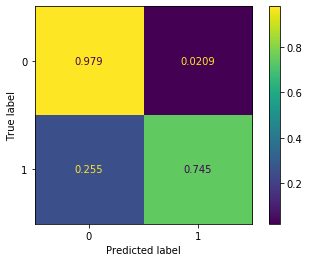

In [42]:
plot_confusion_matrix(rf_clf, X_test_scaled, y_test, values_format='.3g',
                     normalize = 'true')


#look into hyperparamter tuning and or gridsearch
#And another model as well
#Feature Importance
# DO GRIDSEARCH ON RECALL

plt.show()

### XGB

Training score:  0.97
Test score:  0.96
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       863
           1       0.96      0.74      0.84       137

    accuracy                           0.96      1000
   macro avg       0.96      0.87      0.91      1000
weighted avg       0.96      0.96      0.96      1000



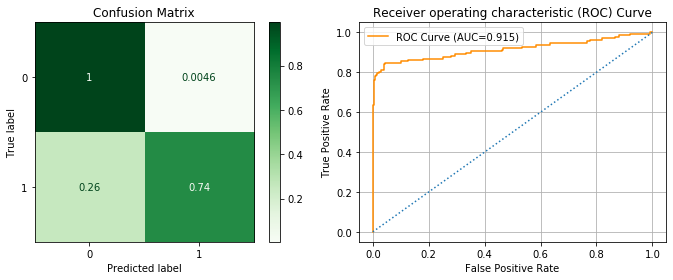

In [44]:
xgb_rf = XGBClassifier()
xgb_rf.fit(X_train, y_train)
print('Training score: ' ,round(xgb_rf.score(X_train,y_train),2))
print('Test score: ',round(xgb_rf.score(X_test,y_test),2))

y_hat_test = xgb_rf.predict(X_test)

evaluate_model(y_test,y_hat_test,X_test,xgb_rf)

## SHAP

In [ ]:
explainer = shap.TreeExplainer(xgb_rf)

In [ ]:
shap_values = explainer.shap_values(X_train_scaled,y_train)
shap.summary_plot(shap_values, X_train_scaled, plot_type="bar")

In [ ]:
shap.summary_plot(shap_values,X_train_scaled)

## GridSearch

In [ ]:
best_score = cross_val_score(rf_clf, X_train, y_train, cv=3)

mean_best_score = np.mean(best_score)
print(mean_best_score)

In [ ]:
grid_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 4, 5, 6, 8, 10, 12],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [2,4, 6, 8, 10, 12, 14],
}

In [ ]:
rf_grid_search = GridSearchCV(rf_clf, grid_params, cv=3,
                              return_train_score=True)

rf_grid_search.fit(X_train, y_train)

In [ ]:
rf_gs_training_score = np.mean(rf_grid_search.cv_results_['mean_train_score'])

# Mean test score
rf_gs_testing_score = rf_grid_search.score(X_test, y_test)

print(f"Avg. Training Score: {rf_gs_training_score :.2%}")
print(f"Avg. Test Score: {rf_gs_testing_score :.2%}")
print("Best Param Combo:")
rf_grid_search.best_params_


In [ ]:
rf_score = rf_grid_search.score(X_test, y_test)

print(rf_score)

## Conclusion

Following the exploration of the dataset we can conclude on a few things. That our model performed very well. With a 94% accuracy using our random forests model and a 96% accuracy after apply XGB Boost. The other important result we wanted to look at was Recall. After reviewing the information we can confirm that the top 5 most important features are:

- International Plan Number (less likely to churn)
- Total International Calls (less likely to churn)
- Total International Minutes (more likely to churn)
- Customer Service Calls (more likely to churn)
- Total Night Minutes (more likely to churn)

